# Monitor training

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [149]:
%pwd

'/home/ecotner/neural_tsp/notebooks/training'

In [150]:
train_df = pd.read_csv("train.log")
size = len(train_df)
print(f"{size} rows/episodes")
train_df.tail()

560446 rows/episodes


,loss,reward,q_value
560441,13.543301,-27.105644,-23.425522
560442,6.028607,-28.476009,-30.931332
560443,23.530127,-21.969223,-17.118437
560444,6.269824,-14.532501,-17.036463
560445,22.590267,-24.702879,-19.949957


In [151]:
ma = train_df.ewm(span=len(train_df)/30).mean()

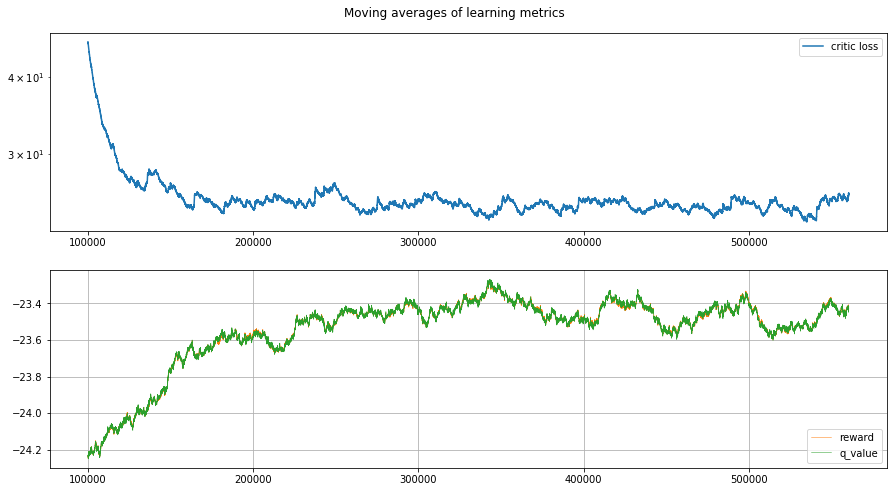

In [158]:
fig, axes = plt.subplots(nrows=2, figsize=(15,8))
skip = 100000

axes[0].plot(ma.iloc[skip:]['loss'], label='critic loss')
axes[0].set_yscale('log')
axes[0].legend(loc="upper right")

axes[1].plot(ma.iloc[skip:]['reward'], label='reward', color="C1", linewidth=0.5)
axes[1].plot(ma.iloc[skip:]['q_value'], label='q_value', color="C2", linewidth=0.5)
axes[1].grid()
axes[1].legend(loc="lower right")

fig.suptitle("Moving averages of learning metrics", x=0.5, y=0.925)
# plt.subplots_adjust(right=2, top=1.5)
plt.show()

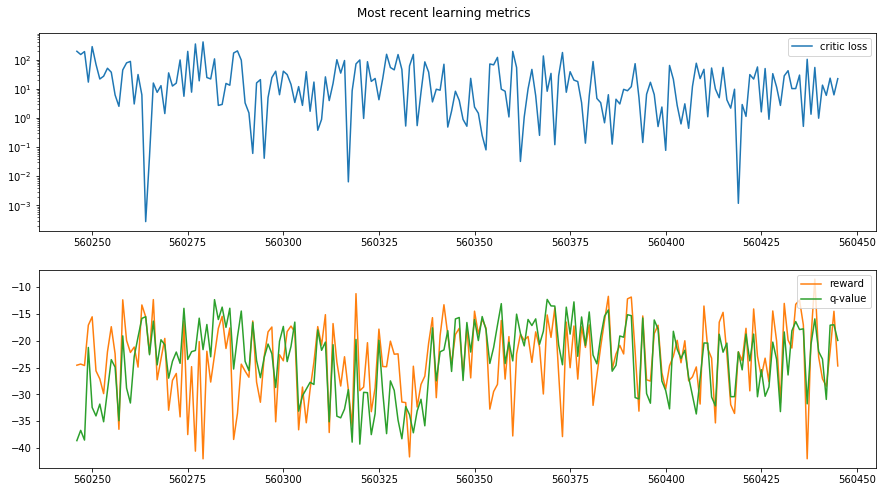

In [153]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 8))
window = 200
df = train_df.iloc[-window:]

axes[0].plot(df['loss'], label='critic loss')
axes[0].set_yscale('log')
axes[0].legend(loc="upper right")
axes[1].plot(df['reward'], label='reward', color="C1")
axes[1].plot(df['q_value'], label='q-value', color="C2")
axes[1].legend(loc="upper right")

fig.suptitle("Most recent learning metrics", x=0.5, y=0.925)
plt.show()

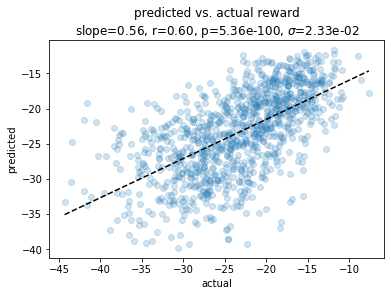

In [154]:
window = 1000
x = train_df.iloc[-window:]['reward'].values
y = train_df.iloc[-window:]['q_value'].values
plt.scatter(x, y, alpha=1/5)
m, b, r, p, s = stats.linregress(x, y)
x = np.linspace(x.min(), x.max(), 3)
y = m*x + b
plt.plot(x, y, linestyle="--", color='black')
plt.title(f"predicted vs. actual reward\nslope={m:.2f}, r={r:.2f}, p={p:.2e}, $\sigma$={s:.2e}")
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()